In [17]:
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import os
from sklearn.model_selection import train_test_split

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [17]:
#!mkdir fifty_reso_data

In [3]:
base_dir ='./fifty_reso_data/' 
#train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validate')

In [16]:
folder = './fifty_reso_data/'
filelist=os.listdir(folder)
for fichier in filelist:
    if not(fichier.endswith(".png")):
        filelist.remove(fichier)
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
ims = [read(os.path.join(folder, filename)) for filename in filelist]
im_array = np.array(ims, dtype='uint8')
im_array = im_array / 255.0

In [128]:
X_train, X_test = train_test_split(im_array, test_size=0.1, random_state=42)


In [ ]:
datagen = ImageDataGenerator(
             rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)


autoencoder.fit_generator(datagen.flow(X_train, X_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=100,
                         validation_data=(X_test, X_test),
                        validation_steps=8 )



In [4]:
# dimensions of our images.
img_width, img_height = 50,50

# https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720
# https://gist.github.com/mstfldmr/44dfce35f5330b22ee1e3b28ca91a3e7
# https://towardsdatascience.com/make-your-data-talk-13072f84eeac

In [50]:
base = 'fifty_reso_data/'
train_dir =  os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validate')

In [53]:
print(train_dir)
print(validation_dir)

./fifty_reso_data/train
./fifty_reso_data/validate


In [52]:

train_datagen = ImageDataGenerator(
    
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True)


validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')





Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [123]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(50,50,3)))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(16, (3, 3), strides=(2,2), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

#autoencoder.add(MaxPooling2D((2, 2), padding='same'))
#autoencoder.add(Conv2D(16, (3, 3), strides=(2,2), activation='relu', padding='same'))
autoencoder.add(Flatten())
autoencoder.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_232 (Conv2D)          (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_233 (Conv2D)          (None, 25, 25, 32)        18464     
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_234 (Conv2D)          (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_235 (Conv2D)          (None, 2, 2, 8)         

In [124]:
# Flatten encoding for visualization
#autoencoder.add(Flatten())

autoencoder.add(Reshape((4,4,2)))
autoencoder.summary()


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_232 (Conv2D)          (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_233 (Conv2D)          (None, 25, 25, 32)        18464     
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_234 (Conv2D)          (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_235 (Conv2D)          (None, 2, 2, 8)         

In [125]:
# Decoder Layers
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(32, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(64, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(3, (3, 3), activation='sigmoid'))

autoencoder.summary()


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_232 (Conv2D)          (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_233 (Conv2D)          (None, 25, 25, 32)        18464     
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_234 (Conv2D)          (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_235 (Conv2D)          (None, 2, 2, 8)         

In [126]:
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.compile(loss='mean_squared_error',optimizer=RMSprop())

In [ ]:
#batch_size = 8
# Train the model
autoencoder.fit(X_train, X_train,
                epochs=1000,
                batch_size=64,
                validation_data=(X_test, X_test))

In [29]:
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))

In [31]:
decoded_imgs = autoencoder.predict(X_test)

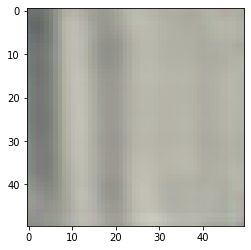

In [34]:
 plt.imshow(decoded_imgs[1])

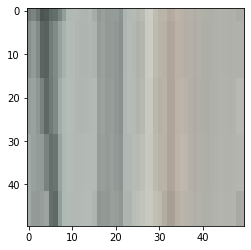

In [35]:
plt.imshow(X_test[1])